<a href="https://colab.research.google.com/github/abirami-arivazhagan/Trafficprediction-ML/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
d=pd.read_csv("futuristic_city_traffic.csv")
d= d.dropna()


In [ ]:

d.shape

(69644, 11)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69644 entries, 0 to 69643
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   69644 non-null  object 
 1   Vehicle Type           69644 non-null  object 
 2   Weather                69644 non-null  object 
 3   Economic Condition     69644 non-null  object 
 4   Day Of Week            69644 non-null  object 
 5   Hour Of Day            69644 non-null  int64  
 6   Speed                  69644 non-null  float64
 7   Is Peak Hour           69644 non-null  int64  
 8   Random Event Occurred  69644 non-null  int64  
 9   Energy Consumption     69644 non-null  float64
 10  Traffic Density        69644 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 5.8+ MB


In [ ]:
d.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,69644.000000,69644.000000,69644.000000,69644.000000,69644.000000,69644.000000
mean,11.490035,60.018644,0.156711,0.050299,49.569617,0.277763
std,6.910554,26.580119,0.363531,0.218562,25.330125,0.219450
min,0.000000,0.000000,0.000000,0.000000,5.605700,0.007100
25%,6.000000,37.624550,0.000000,0.000000,29.224975,0.106300
50%,11.000000,58.641800,0.000000,0.000000,45.914850,0.219400
75%,17.000000,80.454825,0.000000,0.000000,66.032400,0.398800
max,23.000000,163.088600,1.000000,1.000000,187.144600,2.336100


<ipython-input-41-3bd7d6f0eb47>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(d.corr() > 0.9,


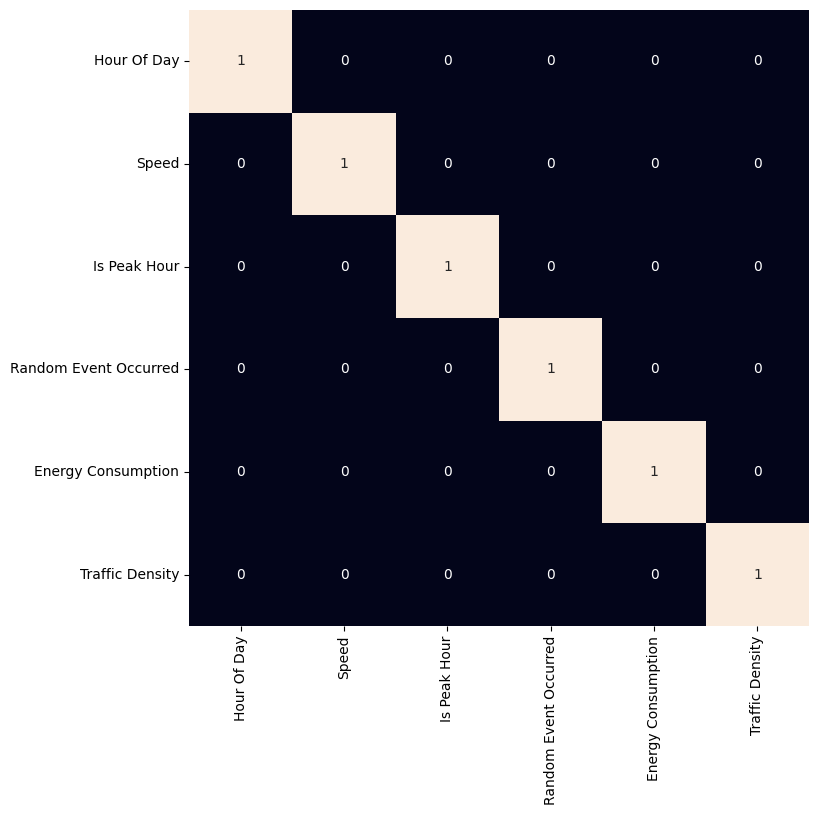

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(d.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

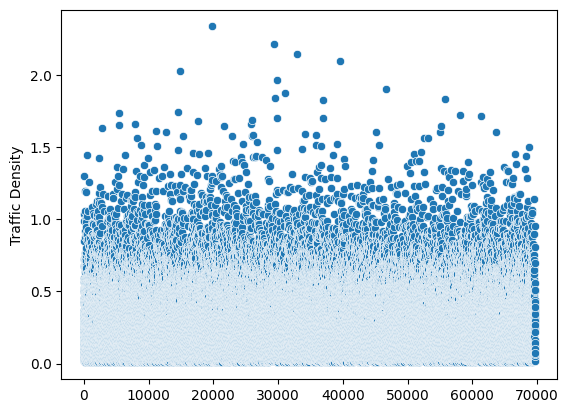

In [ ]:
sb.scatterplot(d['Traffic Density'])
plt.show()

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['City', 'Vehicle Type', 'Weather', 'Day Of Week']
for column in categorical_columns:
    label_encoder.fit(d[column])
    d[column] = label_encoder.transform(d[column])

X = d[['City', 'Vehicle Type', 'Weather', 'Day Of Week','Hour Of Day','Speed','Is Peak Hour','Random Event Occurred']]
y=d['Traffic Density']
y= (y1 > 0.2).astype(int)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

0        1
1        1
2        0
3        0
4        1
        ..
69639    0
69640    0
69641    1
69642    0
69643    1
Name: Traffic Density, Length: 69644, dtype: int64


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import numpy as np
a= input("City")
b= input("Vehicle Type")
c = input("Weather")
d = input("Day Of Week")
e = int(input("Hour Of Day"))
f = float(input("Speed"))
g = int(input("Is Peak Hour"))
h = int(input("Random Event Occurred"))
user_input = np.array([[a,b,c,d,e,f,g,h]])

CityAquaCity
Vehicle TypeTruck
WeatherSunny
Day Of WeekWednesday
Hour Of Day2
Speed118.8
Is Peak Hour0
Random Event Occurred0


In [ ]:
if a=="SolarisVille":
    a=4
if a=="AquaCity":
    a=0
if a=="Neuroburg":
    a=3
if a=="Ecoopolis":
    a=1
if a=="TechHaven":
    a=5
if a=="MetropolisX":
    a=2
if b=="TwoWheeler":
    b=2
if b=="Truck":
    b=3
if b=="Auto":
    b=0
if b=="Car":
    b=1
if c=="Snowy":
    c=3
if c=="Sunny":
    c=4
if c=="Clear":
    c=0
if c=="Rainy":
    c=2
if c=="Electromagnetic Storm":
    c=1
if d=="Sunday":
    d=3
if d=="Monday":
    d=1
if d=="Tuesday":
    d=5
if d=="Wednesday":
    d=6
if d=="Thursday":
    d=4
if d=="Friday":
    d=0
if d=="Saturday":
    d=2

In [ ]:
user_input = np.array([[a,b,c,d,e,f,g,h]])
predicted_quality = model.predict(user_input)
print(predicted_quality)
if predicted_quality==1:
      print("The traffic is high")
if predicted_quality==0:
      print("The traffic is low")



[1]
the traffic is high
